In [3]:
! grep -c '>' E-Coli_UniRef*

E-Coli_UniRef100.fasta:3516528
E-Coli_UniRef50.fasta:133663
E-Coli_UniRef90.fasta:372845


In [4]:
from Bio import SeqIO
import random

train_eval_sizes = {100: (1_500_000, 500_000), # ~1M test
                     90: (  170_000, 100_000),  # ~100k test
                     50: (   50_000,  25_000), # ~ 58k test
                    }

id_list = train_eval_sizes.keys()

In [5]:
for i in id_list:
  file_dir = f"E-Coli_UniRef{i}.fasta"

  records = list(SeqIO.parse(file_dir, "fasta"))
  print(f"total number of sequences for {file_dir}  : ",len(records))


  random.shuffle(records)
  i1,i2 = train_eval_sizes[i]
  
  SeqIO.write(records[:i1], f"E-Coli_UniRef{i}-TRAINING.fasta", "fasta")
  SeqIO.write(records[i1:i1+i2], f"E-Coli_UniRef{i}-EVAL.fasta", "fasta")
  SeqIO.write(records[i1+i2:], f"E-Coli_UniRef{i}-TESTING.fasta", "fasta")

total number of sequences for E-Coli_UniRef100.fasta  :  3516528
total number of sequences for E-Coli_UniRef90.fasta  :  372845
total number of sequences for E-Coli_UniRef50.fasta  :  133663




UniRef100

------ ALL on 3516528 sequences
------ training on 1500000 sequences
------ validation on 500000 sequences
------ testing on 1516528 sequences
Bin size: 20.0


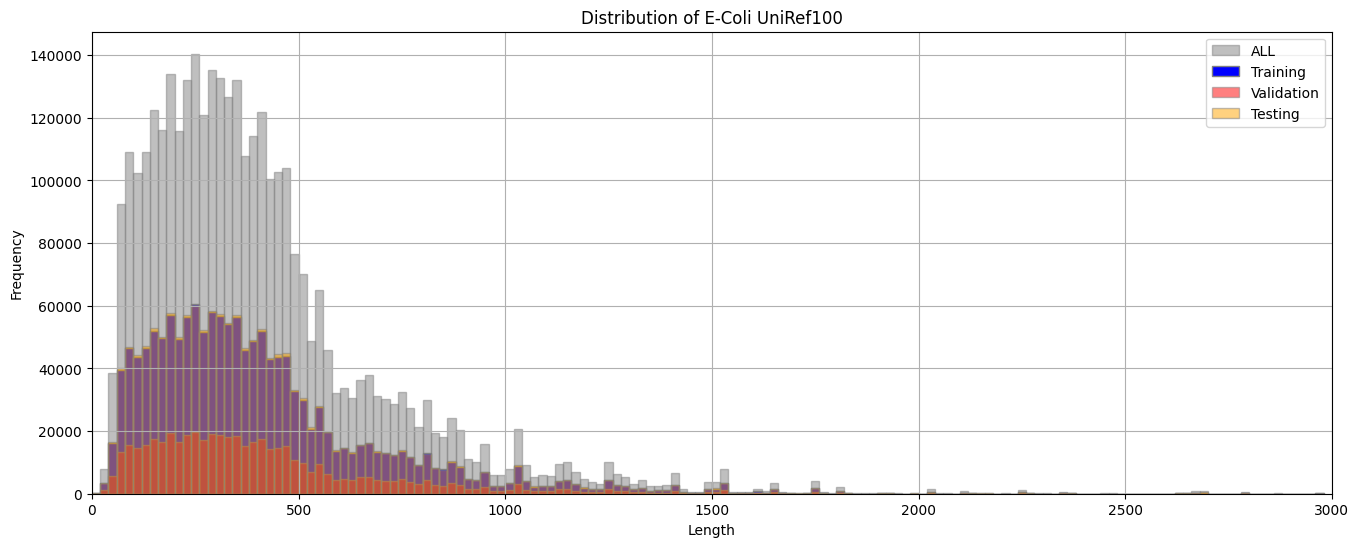



UniRef90

------ ALL on 372845 sequences
------ training on 170000 sequences
------ validation on 100000 sequences
------ testing on 102845 sequences
Bin size: 20.0


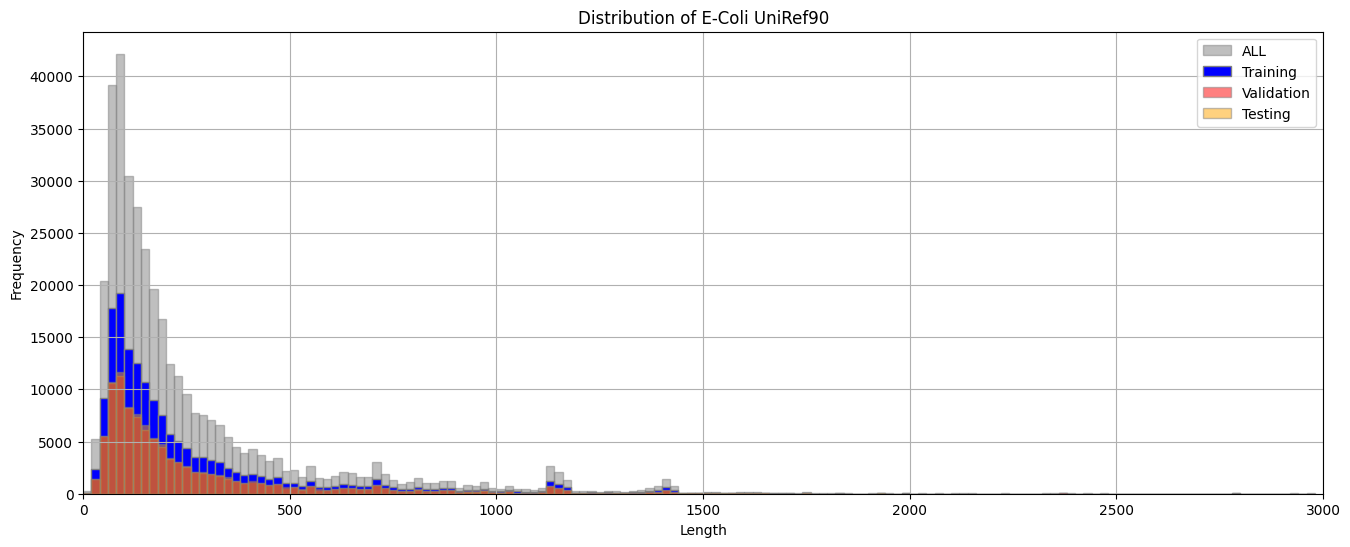



UniRef50

------ ALL on 133663 sequences
------ training on 50000 sequences
------ validation on 25000 sequences
------ testing on 58663 sequences
Bin size: 20.0


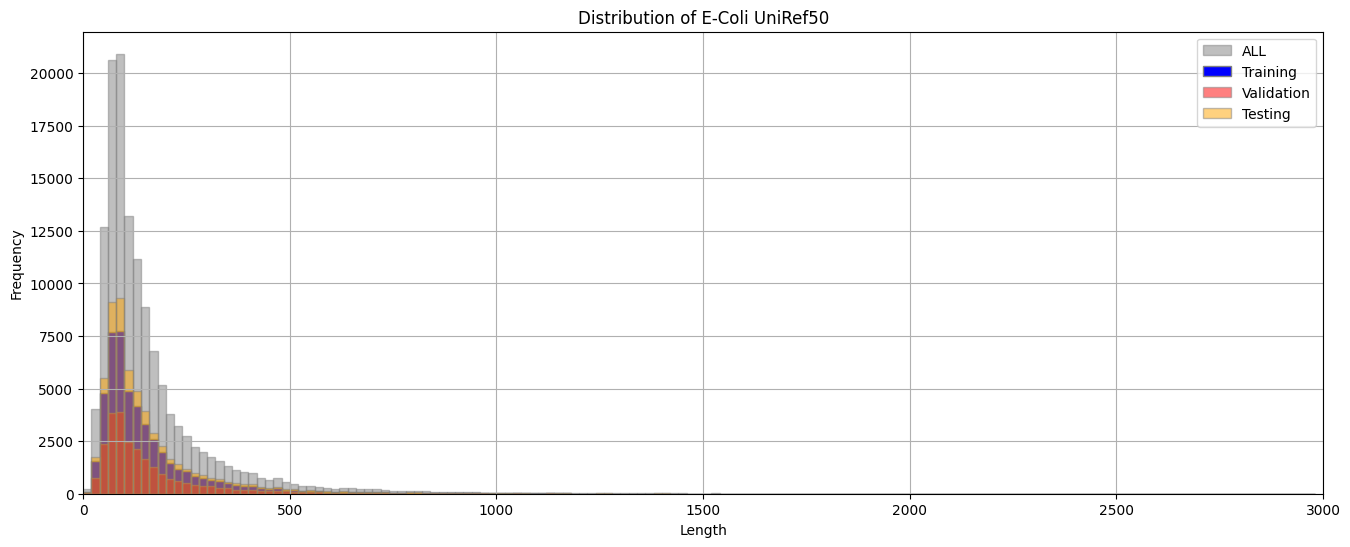

In [12]:
# Length distribution:
import matplotlib.pyplot as plt

bins=range(0, 3000, 20)

for i in id_list:
  print(f"\n\nUniRef{i}\n")
  # ALL
  all_sequences = [ r.seq for r in SeqIO.parse(f"E-Coli_UniRef{i}.fasta", "fasta")]
  print(f"------ ALL on {len(all_sequences)} sequences")
  all_lengths=[ len(s) for s in all_sequences]
      
  # TRAINING
  train_sequences = [ r.seq for r in SeqIO.parse(f"E-Coli_UniRef{i}-TRAINING.fasta", "fasta")]
  print(f"------ training on {len(train_sequences)} sequences")
  train_lengths=[ len(s) for s in train_sequences]


  # VALIDATING
  val_sequences = [ r.seq for r in SeqIO.parse(f"E-Coli_UniRef{i}-EVAL.fasta", "fasta")]
  print(f"------ validation on {len(val_sequences)} sequences")
  val_lengths=[ len(s) for s in val_sequences]

  # TESTING
  test_sequences = [ r.seq for r in SeqIO.parse(f"E-Coli_UniRef{i}-TESTING.fasta", "fasta")]
  print(f"------ testing on {len(test_sequences)} sequences")
  test_lengths=[ len(s) for s in test_sequences]

  plt.figure(figsize=(16, 6))
  n, bins, patches = plt.hist(all_lengths, bins=bins, color='grey', edgecolor='grey', alpha = .5)
  n, bins, patches = plt.hist(train_lengths, bins=bins, color='blue', edgecolor='grey', alpha = 1)
  n, bins, patches = plt.hist(val_lengths, bins=bins, color='red', edgecolor='grey', alpha = .5)
  n, bins, patches = plt.hist(test_lengths, bins=bins, color='orange', edgecolor='grey', alpha = .5)
  plt.title(f'Distribution of E-Coli UniRef{i}')
  plt.xlabel('Length')
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.xlim([0,3000])
#   plt.ylim([0,1500])
  plt.legend(['ALL','Training','Validation','Testing'])
  print("Bin size:",bins[2]-bins[1])
  plt.show()
      